# Designing Self-driving Earbuds - Overview

with AugmentedHearing

# Comparison

Here we have an example of the output of AugmentedHearing and DeepFilterNet.

We use the original file

In [11]:
import IPython
### FILE WITH NOISE
IPython.display.Audio("./Comparison AH vs stock DF/SNR-5.wav")

Output of AugmentedHearing model

In [12]:
### PATH TO Augmented Hearing off-the-shelf output file
IPython.display.Audio("./Comparison AH vs stock DF/SNR-5_AugmentedHearing.wav")

Output of DeepFilterNet

In [13]:
### PATH TO DF off-the-shelf output file
IPython.display.Audio("./Comparison AH vs stock DF/SNR-5_DeepFilterNet2.wav")

The tests that we have conducted to compare the outputs in the report are in the file 'measures.py'.

# Training DeepFilterNet

The modified model can be found in the file 'deepfilternetreduced.py'.

In order to train the network we set up the environment (requires BASH).

In [14]:
!pip install deepfilternet
!pip install deepfilternet[train]

Defaulting to user installation because normal site-packages is not writeable
zsh:1: no matches found: deepfilternet[train]


In order to setup the data we first get the paths to the first $$40\cdot500=20000$$ speech files.

This can be achieved by running the script below:

In [5]:
!python getpaths.py

This produces the file paths.txt.

We then set up the data to HDF5 format. This only works on Linux as far as we gather from the authors.

In [7]:
!python DeepFilterNet/scripts/prepare_data.py speech paths.txt train/training_500_samples.hdf5

2023-01-04 20:25:52 | INFO     | DF | Running on torch 1.13.0+cu117
2023-01-04 20:25:52 | INFO     | DF | Running on host desktop-manjaro
fatal: not a git repository (or any of the parent directories): .git
2023-01-04 20:25:52 | INFO     | DF | Using speech working directory 
2023-01-04 20:25:52 | INFO     | DF | Checking all audio files complete
/home/peterrc/Documents/02456_final_project/DeepFilterNet/scripts/prepare_data.py:46: UserWarning: swmr=True only affects read ('r') mode. For swmr write mode, set f.swmr_mode = True after opening the file.
  with h5.File(file_name, "a", libver="latest", swmr=True) as f, torch.no_grad():
2023-01-04 20:25:53 | INFO     | DF |  0% | Writing file data/raw_data_subset_500_samples/0/book_02330_chp_0012_reader_04859_23_seg_2.wav to the speech dataset.
2023-01-04 20:25:53 | INFO     | DF |  0% | Writing file data/raw_data_subset_500_samples/0/book_06403_chp_0005_reader_08804_55_seg_1.wav to the speech dataset.
2023-01-04 20:25:53 | INFO     | DF |  0

We do the same with the white noise sample. Here we just create a white_noise_path.txt file with the path to the white noise sample.

In [8]:
%%file white_noise_path.txt
./data/raw_data_white_noise_sample/white_10s.wav

Writing white_noise_path.txt


We create a dataset.cfg file which is quite simple

In [15]:
%%file train/dataset.cfg
{
    "test": [
        [
            "training_500_samples.hdf5",
            1
        ],
        [
            "noise.hdf5",
            1
        ]
    ],
    "train": [
        [
            "training_500_samples.hdf5",
            1
        ],
        [
            "noise.hdf5",
            1
        ]
    ],
    "valid": [
        [
            "training_500_samples.hdf5",
            1
        ],
        [
            "noise.hdf5",
            1
        ]
    ]
}


Writing train/dataset.cfg


FileNotFoundError: [Errno 2] No such file or directory: 'train/dataset.cfg'

In [9]:
!python DeepFilterNet/scripts/prepare_data.py noise white_noise_path.txt train/noise.hdf5

2023-01-04 20:26:02 | INFO     | DF | Running on torch 1.13.0+cu117
2023-01-04 20:26:02 | INFO     | DF | Running on host desktop-manjaro
fatal: not a git repository (or any of the parent directories): .git
2023-01-04 20:26:02 | INFO     | DF | Using speech working directory 
2023-01-04 20:26:02 | INFO     | DF | Checking all audio files complete
/home/peterrc/Documents/02456_final_project/DeepFilterNet/scripts/prepare_data.py:46: UserWarning: swmr=True only affects read ('r') mode. For swmr write mode, set f.swmr_mode = True after opening the file.
  with h5.File(file_name, "a", libver="latest", swmr=True) as f, torch.no_grad():
2023-01-04 20:26:02 | INFO     | DF |  0% | Writing file data/raw_data_white_noise_sample/white_10s.wav to the noise dataset.
2023-01-04 20:26:02 | INFO     | DF | Added 1 samples to the group noise.


Training requires editing the installation files of DeepFilterNet and is only possible on Linux per the documentation. The file to be edited is the models.py file (path to this file on the default installation on linux is ~/.local/lib/python3.10/site-packages/df) where both instances of deepfilternet3 has to be changed to deepfilternet in order to use the correct model.  Now we can train the network with the command. In order to train our own model DeepFilterNetReduced the file deepfilternetreduced.py should be pasted into ~/.local/lib/python3.10/site-packages/df as deepfilternet.py.

In [5]:
!python DeepFilterNet/train.py train/dataset.cfg train models/model1 

2023-01-04 20:00:08 | INFO     | DF | Running on torch 1.13.0+cu117
2023-01-04 20:00:08 | INFO     | DF | Running on host desktop-manjaro
fatal: not a git repository (or any of the parent directories): .git
2023-01-04 20:00:08 | INFO     | DF | Loading model settings of model1
2023-01-04 20:00:08 | INFO     | DF | Running on device cuda:0
2023-01-04 20:00:08 | INFO     | DF | Initializing model `deepfilternet`
2023-01-04 20:00:10 | INFO     | DF | Initializing dataloader with data directory train
2023-01-04 20:00:10 | INFO     | DF | Loading HDF5 key cache from train/.cache_dataset.cfg
2023-01-04 20:00:10 | WARNING  | DF | Hash does not match for training_500_samples.hdf5 (found 12494116608586462793, expected 13689758453963164059)
2023-01-04 20:00:10 | WARNING  | DF | Hash does not match for noise.hdf5 (found 12912621343382364093, expected 8959387578240495036)
2023-01-04 20:00:10 | WARNING  | DF | Hash does not match for noise.hdf5 (found 12912621343382364093, expected 8959387578240495

And use it to produce output. The models we pretrained DeepFilterNet and DeepFilterNetReduced on 20000 samples can also be used by changing model1 to 5_epochs_deepfilternet_20000_samples_white_noise or 5_epochs_deepfilternet_reduced_20000_samples_white_noise.

In [20]:
!python DeepFilterNet/enhance.py -m models/model1 -o output test_clips/SNR0.wav

2023-01-04 19:30:02 | INFO     | DF | Running on torch 1.13.0+cu117
2023-01-04 19:30:02 | INFO     | DF | Running on host desktop-manjaro
fatal: not a git repository (or any of the parent directories): .git
2023-01-04 19:30:02 | INFO     | DF | Loading model settings of model1
2023-01-04 19:30:02 | INFO     | DF | Initializing model `deepfilternet`
2023-01-04 19:30:03 | WARNING  | DF | Could not find `best` checkpoint. Checking for default...
2023-01-04 19:30:03 | INFO     | DF | Found checkpoint models/model1/checkpoints/model_1.ckpt with epoch 1
2023-01-04 19:30:04 | INFO     | DF | Running on device cuda:0
2023-01-04 19:30:04 | INFO     | DF | Model loaded
2023-01-04 19:30:04 | INFO     | DF | Enhanced noisy audio file 'SNR0.wav' in 0.5s (RT factor: 0.052)


We can then play this file like so:

In [21]:
### Use newly trained network to produce output
IPython.display.Audio("output/SNR0_model1.wav")

# Metrics

In order to calculate SI-SDR and WB-PESQ for the stock version of DeepFilterNet, DeepFilterNet2 and AugmentedHearings model we can run the following script

In [28]:
!python "Comparison AH vs stock DF"/measures.py

SI_SDR DF:
tensor(-15.3434)
tensor(-15.4261)
tensor(-15.4760)
tensor(-15.4892)
tensor(-15.4761)
SI_SDR DF2:
tensor(-15.4053)
tensor(-15.3574)
tensor(-15.3673)
tensor(-15.3822)
tensor(-15.4251)
SI_SDR AH:
tensor(-41.8784)
tensor(-42.3925)
tensor(-42.6744)
tensor(-43.5468)
tensor(-44.1300)
WB-PESQ DF:
tensor(1.3397)
tensor(1.5201)
tensor(1.7377)
tensor(2.0206)
tensor(2.4255)
WB-PESQ DF2:
tensor(1.4442)
tensor(1.7047)
tensor(2.0472)
tensor(2.4783)
tensor(2.8858)
WB-PESQ AH:
tensor(1.1160)
tensor(1.1885)
tensor(1.3431)
tensor(1.6008)
tensor(2.0450)


In order to calculate SI-SDR and WB-PESQ between our trained version of DeepFilterNet and DeepFilterNetReduced on a training sample they have seen during training we can run the following script

In [29]:
!python "Comparison DF vs DFR/measures.py"

SI_SDR DF:
tensor(-22.4010)
tensor(-21.0668)
tensor(-20.6887)
tensor(-20.4806)
tensor(-20.2197)
SI_SDR DFR:
tensor(-18.6659)
tensor(-17.1730)
tensor(-16.7978)
tensor(-16.6579)
tensor(-16.7573)
WB-PESQ DF:
tensor(1.0316)
tensor(1.0284)
tensor(1.0304)
tensor(1.0360)
tensor(1.0461)
WB-PESQ DFR:
tensor(1.0361)
tensor(1.0304)
tensor(1.0404)
tensor(1.0679)
tensor(1.1391)


In order to calculate SI-SDR and WB-PESQ between our trained version of DeepFilterNet and DeepFilterNetReduced on a training sample they have not seen during training we can run the following script

In [30]:
!python "Comparison DF vs DFR/measures2.py"

SI_SDR DF:
tensor(-53.1453)
tensor(-52.3930)
tensor(-52.8274)
tensor(-52.0734)
tensor(-50.7180)
SI_SDR DFR:
tensor(-52.1303)
tensor(-48.1892)
tensor(-47.6236)
tensor(-46.2295)
tensor(-45.4806)
WB-PESQ DF:
tensor(1.1003)
tensor(1.0687)
tensor(1.0599)
tensor(1.0346)
tensor(1.0434)
WB-PESQ DFR:
tensor(1.0504)
tensor(1.0781)
tensor(1.0260)
tensor(1.0381)
tensor(1.0375)


# A sample result

Now we can plot the waveform of the audio-files before and after denoising.

/tmp/ipykernel_29913/3225202175.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal0 = np.fromstring(signal0, dtype=np.int16)
/tmp/ipykernel_29913/3225202175.py:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal1 = np.fromstring(signal1, dtype=np.int16)
/tmp/ipykernel_29913/3225202175.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal2 = np.fromstring(signal2, dtype=np.int16)
/tmp/ipykernel_29913/3225202175.py:24: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal3 = np.fromstring(signal3, dtype=np.int16)


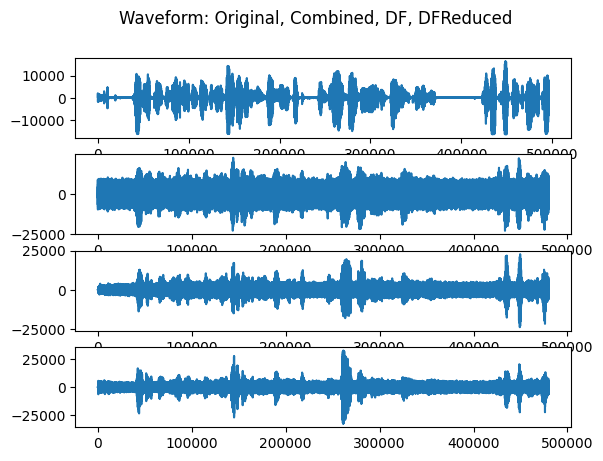

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

### CHANGE PATH FOR f1, f2, f3 corresponding to 
### the three audio files from the folders containing SNR audio files
f0 = wave.open("Comparison DF vs DFR/clean_2_untrained_on.wav", "r")
f1 = wave.open("Comparison DF vs DFR/2SNR-5.wav", "r")
f2 = wave.open("Comparison DF vs DFR/2SNR-5_DF.wav", "r")
f3 = wave.open("Comparison DF vs DFR/2SNR-5_DFR.wav", "r")

signal0 = f0.readframes(-1)
signal0 = np.fromstring(signal0, dtype=np.int16)


signal1 = f1.readframes(-1)
signal1 = np.fromstring(signal1, dtype=np.int16)

signal2 = f2.readframes(-1)
signal2 = np.fromstring(signal2, dtype=np.int16)

signal3 = f3.readframes(-1)
signal3 = np.fromstring(signal3, dtype=np.int16)


fig, axs = plt.subplots(4)
fig.suptitle('Waveform: Original, Combined, DF, DFReduced')
axs[0].plot(signal0)
axs[1].plot(signal1)
axs[2].plot(signal2)
axs[3].plot(signal3)